<a href="https://colab.research.google.com/github/Marco-barthem/Data-Mining-1/blob/main/EstudoExercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install nltk
!pip install wordcloud
!pip install spacy
!python -m spacy download pt_core_news_sm

import nltk
nltk.download('stopwords')
nltk.download('rslp')
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import RSLPStemmer
import spacy
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 63.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


## Importando o DataSET

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/Marco-barthem/Data-Mining-1/refs/heads/main/sentiment-analysis.csv',
                 sep =',',
                 quotechar='"',
                 engine= 'python')
df[['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score']] = df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].str.split(',', expand = True)

In [35]:
df.drop(columns = ['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'], inplace = True)

In [39]:
df_estudo = df['Text']
df_estudo.sample(3)

,Text
11,"""I'm extremely disappointed with their product..."
0,"""I love this product!"""
52,"""The website design is sleek and user-friendly..."


## Pre - processamento

In [58]:
tokenizer = ToktokTokenizer()
stopwords_en = set(stopwords.words('english'))
stopwords_en.update(['i','the','this','it'])

In [60]:
tokens_totais = []
for feedback in df['Text']:
  tokens = tokenizer.tokenize(feedback)
  tokens_filtrados = [token.lower() for token in tokens
    if token.lower() not in stopwords_en and token.isalpha()]
  tokens_totais.extend(tokens_filtrados)

frequencia = Counter(tokens_totais)
top_10 = frequencia.most_common(10)
print(top_10)

[('customer', 15), ('product', 13), ('service', 12), ('website', 11), ('terrible', 10), ('disappointed', 10), ('food', 8), ('restaurant', 8), ('experience', 7), ('movie', 6)]


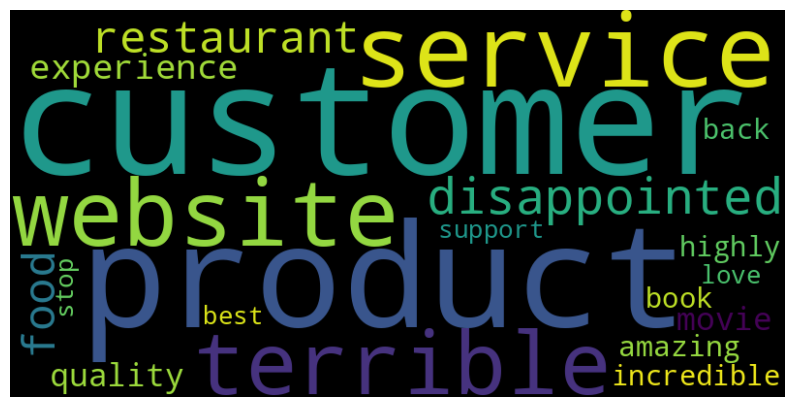

In [61]:
top_20 = dict(frequencia.most_common(20))

# Gerar a nuvem de palavras com os top 20
wordcloud = WordCloud(width=800, height=400, background_color='black', random_state=100).generate_from_frequencies(top_20)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [62]:
from nltk.stem import RSLPStemmer

# Inicializa o stemmer para português
stemmer = RSLPStemmer()

# Dicionário para armazenar o stem e a contagem agregada
stemmed_counts = {}

for word,count in top_20.items():
  stem=stemmer.stem(word)
  stemmed_counts[stem] = stemmed_counts.get(stem, 0) + count

print(stemmed_counts)


{'custom': 15, 'product': 13, 'serv': 12, 'websit': 11, 'terribl': 10, 'disappointed': 10, 'food': 8, 'restaurant': 8, 'experienc': 7, 'movi': 6, 'quality': 6, 'amazing': 5, 'incredibl': 5, 'book': 5, 'highly': 5, 'back': 5, 'lov': 4, 'support': 4, 'best': 4, 'stop': 4}


In [65]:
# Dicionário para armazenar os lemas e a contagem agregada
lemmatized_counts = {}

# Itera sobre as palavras do dicionário
for word, count in top_20.items():
    # Processa a palavra com o spaCy
    doc = nlp(word)
    # Como estamos processando uma única palavra, pegamos o lema do primeiro token
    lemma = doc[0].lemma_
    # Agrega a contagem para o lema correspondente
    lemmatized_counts[lemma] = lemmatized_counts.get(lemma, 0) + count

print(lemmatized_counts)

{'customer': 15, 'product': 13, 'service': 12, 'website': 11, 'terrible': 10, 'disappoint': 10, 'food': 8, 'restaurant': 8, 'experience': 7, 'movie': 6, 'quality': 6, 'amazing': 5, 'incredible': 5, 'book': 5, 'highly': 5, 'back': 5, 'love': 4, 'support': 4, 'well': 4, 'stop': 4}


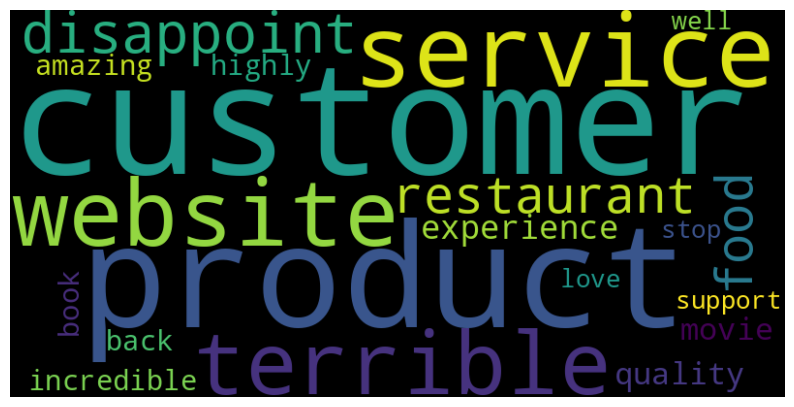

In [66]:
# Gerar a nuvem de palavras com os top 20
wordcloud = WordCloud(width=800, height=400, background_color='black', random_state=100).generate_from_frequencies(lemmatized_counts)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
